# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [106]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [58]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [51]:
len(reviews)

1000

In [61]:
df=pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | That was supposed to be my ...
1,✅ Trip Verified | Have no fear when your BA f...
2,Not Verified | We have flown BA five times fr...
3,✅ Trip Verified | London Heathrow to Istanbul...
4,"Not Verified | Jan 30th, I booked a last-minut..."
...,...
995,✅ Trip Verified | London Heathrow to Madrid. I...
996,✅ Trip Verified | Gatwick to St Lucia return....
997,✅ Trip Verified | It's been many years since ...
998,✅ Trip Verified | \r\nLondon Heathrow / Pisa r...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [64]:
df.to_csv("BA_reviews.csv")

In [65]:
df.shape

(1000, 1)

Now, we will highlight those reviews which have "Trip Verified" tag on them. This is for verified customers.

In [67]:
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0       True
1       True
2      False
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: verified, Length: 1000, dtype: bool

In [70]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop('reviews')
reviews

0      ✅ Trip Verified |  That was supposed to be my ...
1      ✅ Trip Verified |  Have no fear when your BA f...
2      Not Verified |  We have flown BA five times fr...
3      ✅ Trip Verified |  London Heathrow to Istanbul...
4      Not Verified | Jan 30th, I booked a last-minut...
                             ...                        
995    ✅ Trip Verified | London Heathrow to Madrid. I...
996    ✅ Trip Verified |  Gatwick to St Lucia return....
997    ✅ Trip Verified |  It's been many years since ...
998    ✅ Trip Verified | \r\nLondon Heathrow / Pisa r...
999    ✅ Trip Verified | Edinburgh to Boston via Lond...
Name: reviews, Length: 1000, dtype: object

**Remove punctuation**
We have to remove punctuation marks to make data clean and legible

In [71]:
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation,'')
    return text

In [75]:
reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('✅','')
reviews = reviews.str.replace('|', '')
reviews = reviews.str.replace(r'\b(\w{1,3})\b','')
reviews = reviews.apply(remove_punctuation)
reviews

<ipython-input-75-0440e909eb0b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('Trip Verified |', '')
<ipython-input-75-0440e909eb0b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('|', '')
<ipython-input-75-0440e909eb0b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace(r'\b(\w{1,3})\b','')


0         That  supposed    flight    cancelled  hour...
1         Have  fear when your  flight  operated  Fin...
2       Verified    have flown  five times from weste...
3         London Heathrow  Istanbul   start   half-te...
4       Verified   30th,  booked  last-minute, transa...
                             ...                        
995      London Heathrow  Madrid.  travel from  regul...
996       Gatwick   Lucia return. Recently returned f...
997       ' been many years since  flew long haul Bri...
998      \r\nLondon Heathrow / Pisa return.  wife    ...
999      Edinburgh  Boston  London.  planes  ancient ...
Name: reviews, Length: 1000, dtype: object

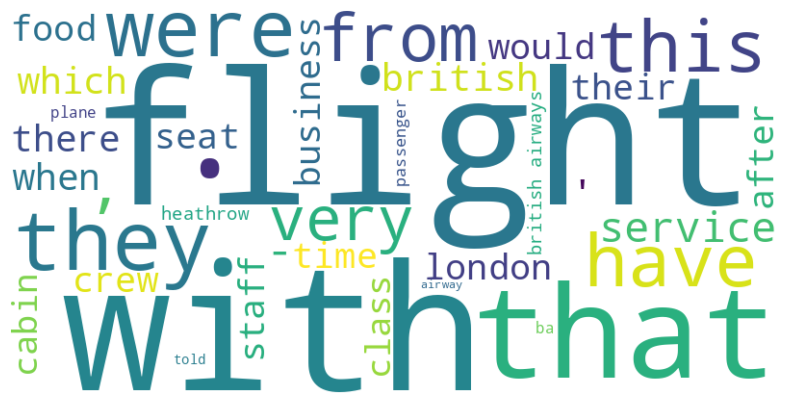

In [121]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:30]
words_dict = freq_words.to_dict()

# Update your words_dict with new words and their frequencies
new_words = {"ba": 10, "flight": 20, "british airways": 15, "airway": 5, "plane": 10, "told": 7, "passenger": 12, "heathrow":15}

for word, freq in new_words.items():
    words_dict[word] = words_dict.get(word, 0) + freq

# Now, generate the word cloud with the updated dictionary
wordcloud.generate_from_frequencies(words_dict)

# Plotting the updated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize = (20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["flight", "ba","british airway","London","food","airways","seats" ]

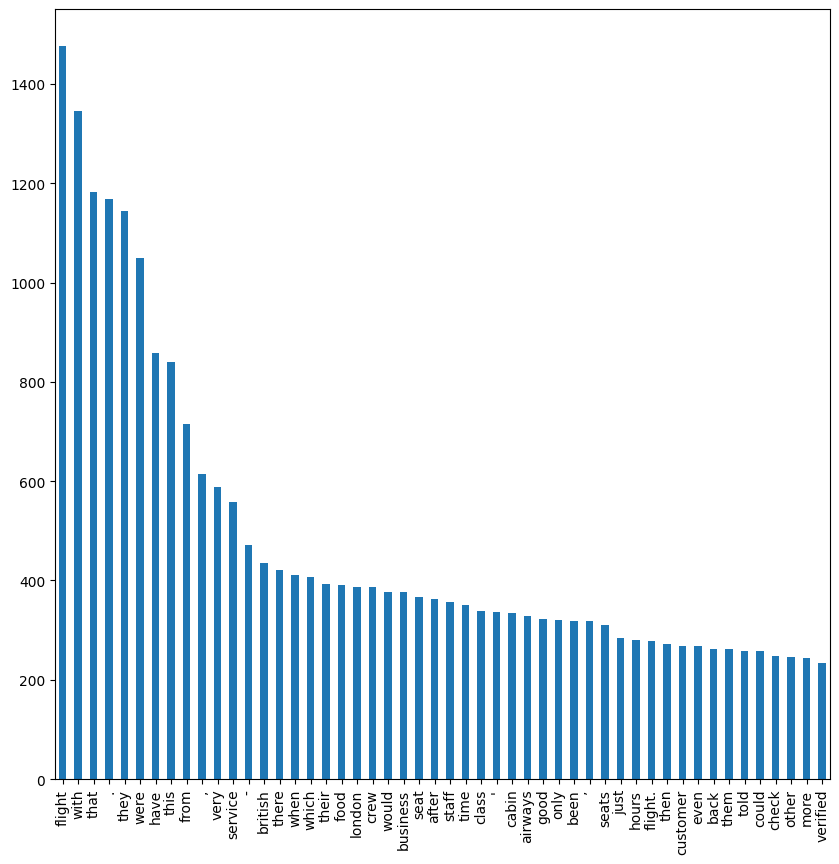

In [80]:
plt.figure(figsize=(10,10))
freq_words.plot.bar(x = freq_words[0], y = freq_words[1])
plt.show()

In [115]:
# categories = ['negative','positive']
# num_cat = len(categories)
# num_cat
categories = ['negative', 'neutral', 'positive']
num_cat = len(categories)

Cleaning the data and Vectorizing it

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tf_idf_vect = TfidfVectorizer(lowercase = True,
                              stop_words='english',
                              ngram_range=(1,1),
                              tokenizer = tokenizer.tokenize)
reviews_counts = tf_idf_vect.fit_transform(reviews)
reviews_counts.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1000, 6752)

In [116]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)
# pred_labels = kmeans.labels_
# pred_labels
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)  # Use 3 clusters now
pred_labels = kmeans.labels_
pred_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1,
       2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1,
       2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2,

In [118]:
# unique, counts  = np.unique(pred_labels, return_counts = True)
# dict(zip(unique,counts))
unique, counts = np.unique(pred_labels, return_counts=True)
category_counts = dict(zip(categories, counts))
category_counts

{'negative': 118, 'neutral': 355, 'positive': 527}

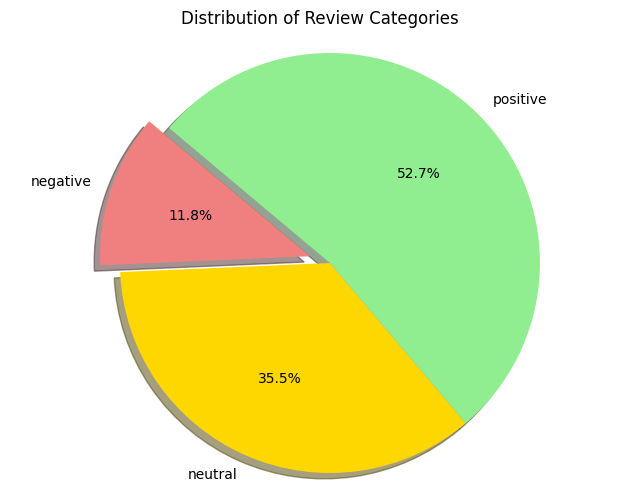

In [120]:
category_counts = {'negative': 118, 'neutral': 355, 'positive': 527}
labels = category_counts.keys()
sizes = category_counts.values()
colors = ['lightcoral', 'gold', 'lightgreen']
explode = (0.1, 0, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Review Categories')
plt.show()

The code earlier is for verified and non-verified reviews 1 = Verified
0 = not verified

In [102]:
df_reviews = pd.DataFrame({'review':reviews,'label':pred_labels})
df_reviews

,review,label
0,That supposed flight cancelled hour...,0
1,Have fear when your flight operated Fin...,1
2,Verified have flown five times from weste...,0
3,London Heathrow Istanbul start half-te...,1
4,"Verified 30th, booked last-minute, transa...",0
...,...,...
995,London Heathrow Madrid. travel from regul...,1
996,Gatwick Lucia return. Recently returned f...,1
997,' been many years since flew long haul Bri...,1
998,\r\nLondon Heathrow / Pisa return. wife ...,1


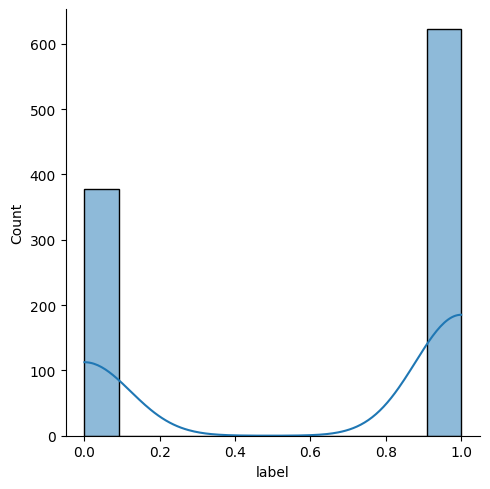

In [105]:
sns.displot(df_reviews['label'], kde = True)